In [ ]:
#default_exp to_submit

# **Learn nbdev !!!!!**

In [ ]:
""" Maths are alright, but the axes length are still weird """

' Maths are alright, but the axes length are still weird '

In [ ]:
# export
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# export
# the cov matrix
# sig1 = 2, sig2 = 1, rho = 0.5
cov = [[4,1],[1,1]]

In [ ]:
# export
# get the points first makes more sense
numpts = 3000
Points = np.random.multivariate_normal([0,0],cov,size=numpts)

Text(0.5, 1.0, 'Raw points to have a look quickly')

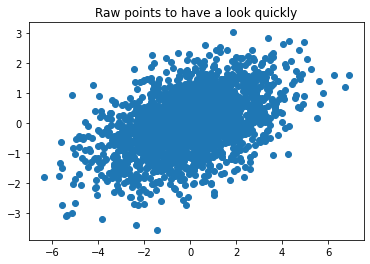

In [ ]:
# plot the darn thing
plt.scatter(Points[:,0],Points[:,1])
plt.title("Raw points to have a look quickly")

In [ ]:
# export
# get vector length
def vlen(v):
    return np.sqrt( np.square(v[-2]) + np.square(v[-1]))

# try it
vlen(np.array([1,2])), vlen(np.array([3,4]))

(2.23606797749979, 5.0)

In [ ]:
# export
# get the eigvals and vecs
eigvals, eigvecs = np.linalg.eig(np.array(cov))
eigvals, eigvecs

(array([4.30277564, 0.69722436]),
 array([[ 0.95709203, -0.28978415],
        [ 0.28978415,  0.95709203]]))

In [ ]:
eigvecs.T[0]

array([0.95709203, 0.28978415])

In [ ]:
# confirm it's an eigenvector
eigvals[0] * eigvecs[0],np.array(cov) @ (eigvecs.T[0])

(array([ 4.11815225, -1.24687618]), array([4.11815225, 1.24687618]))

In [ ]:
# export
major = eigvecs.T[0]
major

array([0.95709203, 0.28978415])

In [ ]:
# export
minor = eigvecs.T[1]
minor

array([-0.28978415,  0.95709203])

In [ ]:
# export
# find the angle of major axis to x axis
# take advantage of high school math: dot product
x_vec = np.array([1,0])
dot = major @ x_vec
ang = np.arccos(dot/(vlen(major)*vlen(x_vec)))
ang * 180 / np.pi

16.845033762989885

# Is the length correct ?

### should be proportional to sqrt(eigvals) !

#### Since std_x = 2 instead of 1, the modified overall std = sqrt(std_x^2 + std_y^2) = sqrt(5)

#### , which would required us to scale the std by 1/std = 1/sqrt(5)

#### from z-score table, we'll get ratio = 0.59

In [ ]:
# export
""" 0.59 meets but i don't know why """ # gets 0.502
rat = 0.59 # 1/sqrt(5) times of standard deviation !?
major_length = 2*eigvals[0]**0.5 * rat
minor_length = 2*eigvals[1]**0.5 * rat
major_length, minor_length

(2.4476896858012918, 0.9852995493868707)

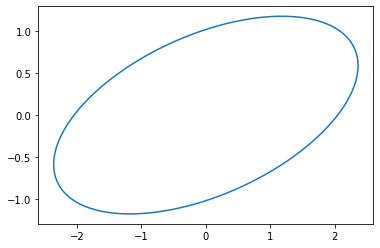

In [ ]:
# export
# get the ellipse again use high school math
cos = np.cos(ang)
sin = np.sin(ang)

def transform_x(x,y):
    return x*cos + y*sin

def transform_y(x,y):
    return x*sin - y*cos

theta = np.arange(0,360,1)*np.pi/180
x = major_length*np.cos(theta)
y = minor_length*np.sin(theta)

x_oval = transform_x(x,y)
y_oval = transform_y(x,y)

In [ ]:
""" just checking """
plt.plot(x_oval,y_oval)
plt.show()

In [ ]:
# export
# define boundary and calculate inside/total
Points_map = [[transform_x(ele[0],ele[1]),transform_y(ele[0],ele[1])] for ele in Points]

In [ ]:
# export
def boundary(point):
    return vlen([point[0]*minor_length,point[1]*major_length])

In [ ]:
boundary(Points_map[1])

1.3416008558418824

In [ ]:
# export
# check if the point is inside the boundary
pts, pts2 = [], []
for i in range(numpts):
    if boundary(Points_map[i]) < major_length*minor_length:
        pts.append(Points[i])
    else:
        pts2.append(Points[i])

In [ ]:
pts[:10]

[array([1.4573683 , 0.93670712]),
 array([-0.48890176, -0.64981106]),
 array([-0.46305378, -0.6788368 ]),
 array([-1.38379012,  0.23854463]),
 array([-0.19670165,  0.43261379]),
 array([0.42085923, 0.12063968]),
 array([-1.35708691,  0.26938453]),
 array([-0.03241474,  0.18244583]),
 array([ 1.44417271, -0.38726659]),
 array([-1.96486666, -0.96364239])]

In [ ]:
# export
ptsn, ptsn2 = np.array(pts), np.array(pts2)

In [ ]:
len(ptsn)/numpts

0.508

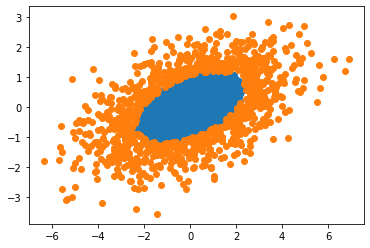

In [ ]:
plt.scatter(ptsn[:,0],ptsn[:,1])
plt.scatter(ptsn2[:,0],ptsn2[:,1])

In [ ]:
major, minor

(array([0.95709203, 0.28978415]), array([-0.28978415,  0.95709203]))

In [ ]:
# export
# major and minor axis line
xx = np.arange(-8,8,1/numpts)
y1 = xx * major[1]/major[0]
y2 = xx * minor[1]/minor[0]

In [ ]:
# orthogonal
major[1]/major[0] * minor[1]/minor[0]

-1.0

In [ ]:
# print ratio
len(ptsn)/numpts

0.508

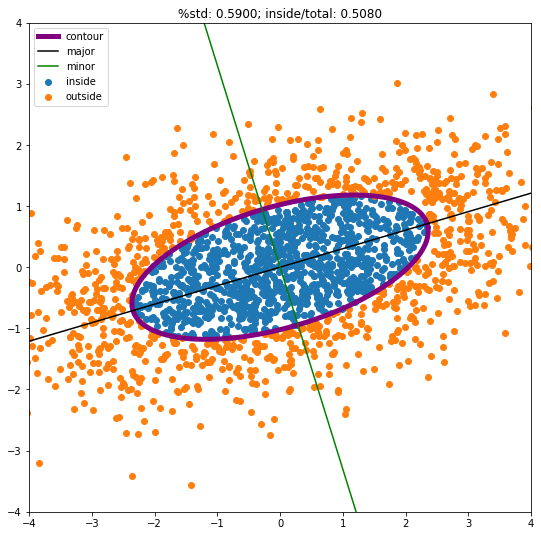

In [ ]:
# export
# result
plt.figure(figsize=(9,9))
plt.plot(x_oval,y_oval,"purple",linewidth=5.0)
plt.scatter(ptsn[:,0],ptsn[:,1])
plt.scatter(ptsn2[:,0],ptsn2[:,1])
plt.plot(xx,y1,"black")
plt.plot(xx,y2,"green")

plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend(["contour","major","minor","inside","outside"])
plt.title(chr(ord('%')) + "std: %.4f; inside/total: %.4f" % (rat, len(ptsn)/numpts))
# change the filename each time, can use os.scandir() to write the right filename automatically
import os
if not os.path.isfile("multnormal\output.png"):
    plt.savefig('output')
plt.show()

In [ ]:
# export everything to a python script and save the result 

## Exploring Chi-squared
#### F(s) = 1 - exp(-s/2) for bivariate normal distribution

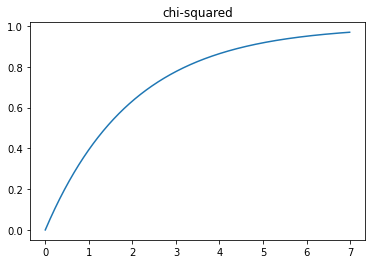

In [ ]:
def chi(s):
    return 1 - np.exp(-s/2)

t = np.arange(0,7,0.01)
plt.plot(t,chi(t))
plt.title("chi-squared")
plt.show()

### It turned out, we need chi-squared distribution for non-standard normal distribution
#### P[x,k,lambda] = exp(-lambda/2) * sum((lambda/2)**j / j! * gamma(k/2,x/2+2j)/gammafunction(k/2)) j from 0 to +inf
#### https://en.wikipedia.org/wiki/Noncentral_chi-squared_distribution#Cumulative_distribution_function

#### Would this work?

In [ ]:
#hide
from nbdev.export import notebook2script
notebook2script()

Converted 00_core.ipynb.
Converted index.ipynb.
Converted oval_clean.ipynb.
